#1. download the "biddings.csv.zip" data and use the first 50,000 data.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Big Data/Lec4/biddings.csv')

In [0]:
df=df.iloc[:50000]
df.shape

(50000, 89)


#2. Standardize all the 88 columns except "convert"

In [0]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split


X, y = df.loc[:,df.columns!='convert'].values, df.loc[:,df.columns=='convert'].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

stdsc = StandardScaler()  
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)


    

#3. Use 5-fold Cross Validation to split dataset into 5 folds and print training and testing sets info for each fold, show us that you understand the behavior of the 5-folds.

In [0]:
from sklearn.model_selection import StratifiedKFold
import numpy as np


kfold = StratifiedKFold(n_splits = 5,random_state = 1,shuffle=True).split(X_train, y_train)

for i, (train, test) in enumerate(kfold):
  print('Fold',i,'mean for (train,test):',(round(np.mean(train)),round(np.mean(test))))

Fold 0 mean for (train,test): (17564.0, 17240.0)
Fold 1 mean for (train,test): (17470.0, 17618.0)
Fold 2 mean for (train,test): (17521.0, 17415.0)
Fold 3 mean for (train,test): (17446.0, 17713.0)
Fold 4 mean for (train,test): (17497.0, 17511.0)


#4. Undersample the data to create a new dataset "new_df" which has equal numbers of the "click" and "not click" data


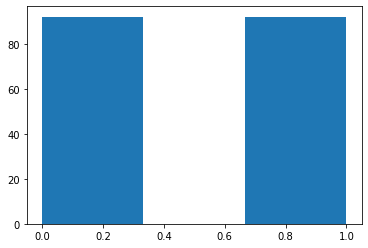

In [0]:
import matplotlib.pyplot as plt

not_click = len(df[df['convert'] == 1])

#Random sample not click indices
not_click_indices = df[df.convert == 0].index
random_indices = np.random.choice(not_click_indices,not_click, replace=False)

# Concat click indices with sample not-click ones
click_indices = df[df.convert == 1].index
under_sample_indices = np.concatenate([click_indices,random_indices])

#Get balanced Data frame
new_df = df.loc[under_sample_indices]

plt.hist(new_df['convert'].tolist(),bins=3)
plt.show()


#5. Use PCA decrease the dimension of the "new_df" to n=2, and plot the scatter plotting. 

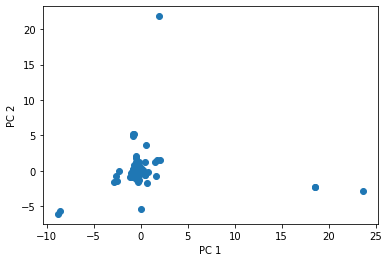

In [0]:

from sklearn.model_selection import train_test_split

X, y = new_df.loc[:,new_df.columns!='convert'].values, new_df.loc[:,new_df.columns=='convert'].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.2, 
                     random_state=42, 
                     stratify=y)

stdsc = StandardScaler()  
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)


from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()


In [0]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
#from sklearn.decomposition import KernelPCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold

from warnings import filterwarnings
filterwarnings('ignore')

names = ["Perceptron",
         "LogisticRegression",
         "Linear SVM", 
         "Decision Tree", 
         "Random Forest", 
         "RBF SVM",          
         "Neural Net", 
         "Naive Bayes",  
         "Nearest Neighbors" 
      ]

classifiers = [
    Perceptron(),
    LogisticRegression(),
    SVC(kernel="linear", C=1, probability = True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=100, max_features=1),
    SVC(gamma=2, C=1, probability = True),
    MLPClassifier(hidden_layer_sizes=(50,50), alpha=1),
    GaussianNB(),
    KNeighborsClassifier(5)
     ]
i=0
for cl in classifiers:
  pipe_lr = Pipeline([('clf', cl)])

  kfold = StratifiedKFold(n_splits = 5).split(X_train_pca, y_train)

  scores = []

  for k, (train, test) in enumerate(kfold):
      pipe_lr.fit(X_train_pca[train], y_train[train].ravel())
      score = pipe_lr.score(X_train_pca[test], y_train[test].ravel())    
      scores.append(score)
  
  print('%s accuracy: %.3f +/- %.3f' %(names[i],np.mean(scores), np.std(scores)))

  i+=1



Perceptron accuracy: 0.544 +/- 0.080
LogisticRegression accuracy: 0.530 +/- 0.061
Linear SVM accuracy: 0.537 +/- 0.036
Decision Tree accuracy: 0.606 +/- 0.061
Random Forest accuracy: 0.578 +/- 0.085
RBF SVM accuracy: 0.523 +/- 0.057
Neural Net accuracy: 0.537 +/- 0.055
Naive Bayes accuracy: 0.490 +/- 0.023
Nearest Neighbors accuracy: 0.510 +/- 0.053


# Algorithm selection with nested cross-validation

##SVC 

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

pipe_svc = make_pipeline(StandardScaler(), SVC(random_state=1,probability=True))
param_range = [ 0.1,1,10,1000]


param_grid = [{'svc__C': param_range,'svc__kernel': ['linear']},
                            
{'svc__C': param_range, 'svc__gamma': param_range, 'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, cv=10, refit=True, n_jobs=-1)

scores = cross_val_score(gs, X_train_pca, y_train,
                        scoring='accuracy', cv=5)

print('svc accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))




svc accuracy: 0.496 +/- 0.055


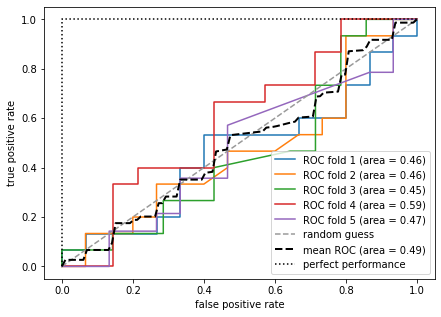

In [0]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.pipeline import make_pipeline

cv = list(StratifiedKFold(n_splits=5,
                         random_state=1).split(X_train_pca, y_train))
fig = plt.figure(figsize=(7,5))
mean_tpr = 0.0
mean_fpr = np.linspace(0,1,100)
all_tpr= []

for i, (train, test) in enumerate(cv):
  probas = gs.fit(X_train_pca[train], 
                       y_train[train]).predict_proba(X_train_pca[test])
  fpr, tpr, thresholds = roc_curve(y_train[test], 
                                  probas[:,1],
                                  pos_label=1)
  mean_tpr += interp(mean_fpr, fpr, tpr)
  mean_tpr[0] = 0.0
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, 
          label='ROC fold %d (area = %0.2f)' % (i+1, roc_auc))
  

plt.plot([0,1],[0,1], linestyle='--', color=(0.6, 0.6, 0.6), label='random guess')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0

mean_auc = auc(mean_fpr, mean_tpr)

plt.plot(mean_fpr, mean_tpr, 'k--',
        label = 'mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.plot([0,0,1], [0,1,1], linestyle=':', color='black', label='perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

##Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier

gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                    param_grid=[{'max_depth': [1,2,3,4,5,6,7,None]}],
                    scoring='accuracy',
                    cv=2)

scores = cross_val_score(gs, X_train_pca, y_train,
                        scoring = 'accuracy', cv = 5)

print('Decision Tree accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores))) 


Decision Tree accuracy: 0.584 +/- 0.088


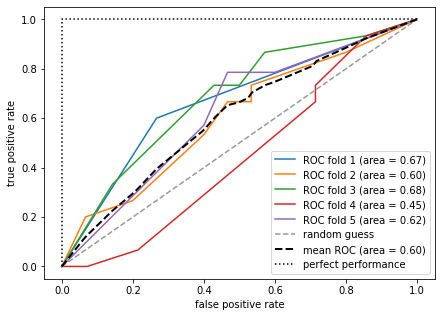

In [0]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.pipeline import make_pipeline

cv = list(StratifiedKFold(n_splits=5,
                         random_state=1).split(X_train_pca, y_train))
fig = plt.figure(figsize=(7,5))
mean_tpr = 0.0
mean_fpr = np.linspace(0,1,100)
all_tpr= []

for i, (train, test) in enumerate(cv):
  probas = gs.fit(X_train_pca[train], 
                       y_train[train]).predict_proba(X_train_pca[test])
  fpr, tpr, thresholds = roc_curve(y_train[test], 
                                  probas[:,1],
                                  pos_label=1)
  mean_tpr += interp(mean_fpr, fpr, tpr)
  mean_tpr[0] = 0.0
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, 
          label='ROC fold %d (area = %0.2f)' % (i+1, roc_auc))
  

plt.plot([0,1],[0,1], linestyle='--', color=(0.6, 0.6, 0.6), label='random guess')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0

mean_auc = auc(mean_fpr, mean_tpr)

plt.plot(mean_fpr, mean_tpr, 'k--',
        label = 'mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.plot([0,0,1], [0,1,1], linestyle=':', color='black', label='perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

##Logistic Regression

In [0]:
from sklearn.tree import DecisionTreeClassifier

gs = GridSearchCV(estimator=LogisticRegression(random_state=0),
                    param_grid=[{'penalty': ['l1', 'l2', 'elasticnet', 'none']}],
                    scoring='accuracy',
                    cv=2)

scores = cross_val_score(gs, X_train_pca, y_train,
                        scoring = 'accuracy', cv = 5)

print('Logistic accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores))) 


Logistic accuracy: 0.530 +/- 0.061


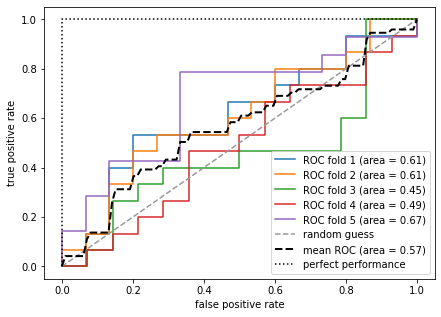

In [0]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.pipeline import make_pipeline

cv = list(StratifiedKFold(n_splits=5,
                         random_state=1).split(X_train_pca, y_train))
fig = plt.figure(figsize=(7,5))
mean_tpr = 0.0
mean_fpr = np.linspace(0,1,100)
all_tpr= []

for i, (train, test) in enumerate(cv):
  probas = gs.fit(X_train_pca[train], 
                       y_train[train]).predict_proba(X_train_pca[test])
  fpr, tpr, thresholds = roc_curve(y_train[test], 
                                  probas[:,1],
                                  pos_label=1)
  mean_tpr += interp(mean_fpr, fpr, tpr)
  mean_tpr[0] = 0.0
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, 
          label='ROC fold %d (area = %0.2f)' % (i+1, roc_auc))
  

plt.plot([0,1],[0,1], linestyle='--', color=(0.6, 0.6, 0.6), label='random guess')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0

mean_auc = auc(mean_fpr, mean_tpr)

plt.plot(mean_fpr, mean_tpr, 'k--',
        label = 'mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.plot([0,0,1], [0,1,1], linestyle=':', color='black', label='perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

##KNeighbors

In [0]:
from sklearn.neighbors import KNeighborsClassifier

gs = GridSearchCV(estimator= KNeighborsClassifier(),
                    param_grid=[{'n_neighbors': [3,4,5,6,7]}],
                    scoring='accuracy',
                    cv=2)

scores = cross_val_score(gs, X_train_pca, y_train,
                        scoring = 'accuracy', cv = 5)

print('KNeighbors accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores))) 

KNeighbors accuracy: 0.558 +/- 0.069


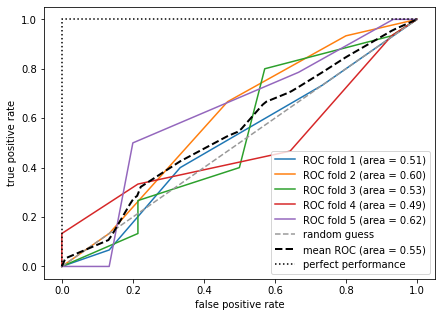

In [0]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.pipeline import make_pipeline

cv = list(StratifiedKFold(n_splits=5,
                         random_state=1).split(X_train_pca, y_train))
fig = plt.figure(figsize=(7,5))
mean_tpr = 0.0
mean_fpr = np.linspace(0,1,100)
all_tpr= []

for i, (train, test) in enumerate(cv):
  probas = gs.fit(X_train_pca[train], 
                       y_train[train]).predict_proba(X_train_pca[test])
  fpr, tpr, thresholds = roc_curve(y_train[test], 
                                  probas[:,1],
                                  pos_label=1)
  mean_tpr += interp(mean_fpr, fpr, tpr)
  mean_tpr[0] = 0.0
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, 
          label='ROC fold %d (area = %0.2f)' % (i+1, roc_auc))
  

plt.plot([0,1],[0,1], linestyle='--', color=(0.6, 0.6, 0.6), label='random guess')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0

mean_auc = auc(mean_fpr, mean_tpr)

plt.plot(mean_fpr, mean_tpr, 'k--',
        label = 'mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.plot([0,0,1], [0,1,1], linestyle=':', color='black', label='perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

##Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

gs = GridSearchCV(estimator= RandomForestClassifier(),
                    param_grid=[{'n_estimators': [300,400,500,600,700]}],
                    scoring='accuracy',
                    cv=2)

scores = cross_val_score(gs, X_train_pca, y_train,
                        scoring = 'accuracy', cv = 5)

print('Random Forest accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores))) 

Random Forest accuracy: 0.543 +/- 0.061


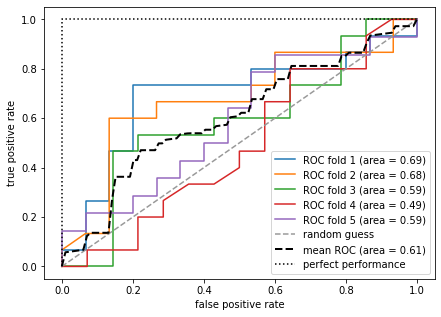

In [0]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.pipeline import make_pipeline

cv = list(StratifiedKFold(n_splits=5,
                         random_state=1).split(X_train_pca, y_train))
fig = plt.figure(figsize=(7,5))
mean_tpr = 0.0
mean_fpr = np.linspace(0,1,100)
all_tpr= []

for i, (train, test) in enumerate(cv):
  probas = gs.fit(X_train_pca[train], 
                       y_train[train]).predict_proba(X_train_pca[test])
  fpr, tpr, thresholds = roc_curve(y_train[test], 
                                  probas[:,1],
                                  pos_label=1)
  mean_tpr += interp(mean_fpr, fpr, tpr)
  mean_tpr[0] = 0.0
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, 
          label='ROC fold %d (area = %0.2f)' % (i+1, roc_auc))
  

plt.plot([0,1],[0,1], linestyle='--', color=(0.6, 0.6, 0.6), label='random guess')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0

mean_auc = auc(mean_fpr, mean_tpr)

plt.plot(mean_fpr, mean_tpr, 'k--',
        label = 'mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.plot([0,0,1], [0,1,1], linestyle=':', color='black', label='perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

#SMOTE

In [0]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

In [0]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 92, 0: 92})


In [0]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test =\
    train_test_split(X_res, y_res, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)
pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)

confmat = confusion_matrix(y_true = y_test, y_pred = y_pred)

print(confmat)

[[18 10]
 [10 18]]


Total number of predictions: 56


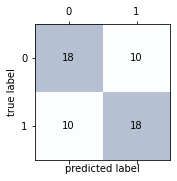

In [0]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, 
               s = confmat[i,j],
                va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
print('Total number of predictions:', len(y_pred))